<a href="https://colab.research.google.com/github/WilliamShengYangHuang/AA_Research/blob/main/Road_Network_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import networkx as nx
import pandas as pd
import random
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
"""
# Create a graph
G = nx.Graph()

# Add 10 nodes (roads)
for i in range(1, 17):
    G.add_node(f"Road{i}")

# Randomly create edges (intersections)
while len(G.edges) < 15:  # Adjust the number of edges as needed
    road1 = random.choice(list(G.nodes))
    road2 = random.choice(list(G.nodes))
    if road1 != road2 and not G.has_edge(road1, road2):
        G.add_edge(road1, road2)

# Convert to adjacency matrix
adj_matrix = nx.adjacency_matrix(G, nodelist=sorted(G.nodes()))

# Convert to DataFrame
df = pd.DataFrame(adj_matrix.todense(), index=sorted(G.nodes()), columns=sorted(G.nodes()))

# Define the path to save the CSV in Google Drive
drive_path = '/content/drive/My Drive/road_network.csv'  # Adjust the path as needed

# Save to CSV
df.to_csv(drive_path)

print("File saved to Google Drive:", drive_path)
"""

'\n# Create a graph\nG = nx.Graph()\n\n# Add 10 nodes (roads)\nfor i in range(1, 17):\n    G.add_node(f"Road{i}")\n\n# Randomly create edges (intersections)\nwhile len(G.edges) < 15:  # Adjust the number of edges as needed\n    road1 = random.choice(list(G.nodes))\n    road2 = random.choice(list(G.nodes))\n    if road1 != road2 and not G.has_edge(road1, road2):\n        G.add_edge(road1, road2)\n\n# Convert to adjacency matrix\nadj_matrix = nx.adjacency_matrix(G, nodelist=sorted(G.nodes()))\n\n# Convert to DataFrame\ndf = pd.DataFrame(adj_matrix.todense(), index=sorted(G.nodes()), columns=sorted(G.nodes()))\n\n# Define the path to save the CSV in Google Drive\ndrive_path = \'/content/drive/My Drive/road_network.csv\'  # Adjust the path as needed\n\n# Save to CSV\ndf.to_csv(drive_path)\n\nprint("File saved to Google Drive:", drive_path)\n'

In [ ]:
# Create a graph
G = nx.Graph()

# Add nodes (roads)
num_nodes = 16
for i in range(1, num_nodes + 1):
    G.add_node(f"Road{i}")

# Assign target degree centrality values (normal distribution within range [2, 15])
mean = (15 + 2) / 2
std_dev = (15 - 2) / 6  # Adjust standard deviation as needed
target_degrees = np.clip(np.random.normal(mean, std_dev, num_nodes), 2, 15)

# Sort nodes by target degrees (to prioritize nodes with higher target degrees)
nodes_by_target_degree = sorted(list(G.nodes), key=lambda x: target_degrees[int(x[4:]) - 1], reverse=True)

# Create edges
for node in nodes_by_target_degree:
    # Get current degree of the node
    current_degree = G.degree(node)

    # Calculate how many more edges are needed to reach target degree
    target_degree = int(target_degrees[int(node[4:]) - 1])
    edges_needed = target_degree - current_degree

    # Add edges
    for _ in range(edges_needed):
        # Select a random node to connect
        potential_nodes = [n for n in nodes_by_target_degree if n != node and not G.has_edge(node, n)]
        if potential_nodes:
            chosen_node = random.choice(potential_nodes)
            G.add_edge(node, chosen_node)

# Check final degree centrality
final_centrality = [G.degree(n) for n in G.nodes()]

# Convert to adjacency matrix
adj_matrix = nx.adjacency_matrix(G, nodelist=sorted(G.nodes()))

# Convert to DataFrame
df = pd.DataFrame(adj_matrix.todense(), index=sorted(G.nodes()), columns=sorted(G.nodes()))

# Define the path to save the CSV in Google Drive
drive_path = '/content/drive/My Drive/road_network.csv'  # Adjust the path as needed

# Save to CSV
df.to_csv(drive_path)

print("File saved to Google Drive:", drive_path)

File saved to Google Drive: /content/drive/My Drive/road_network.csv


In [ ]:
# Convert to adjacency matrix
adj_matrix = nx.adjacency_matrix(G, nodelist=sorted(G.nodes()))

# Convert to DataFrame
df = pd.DataFrame(adj_matrix.todense(), index=sorted(G.nodes()), columns=sorted(G.nodes()))

# Display the DataFrame
df


,Road1,Road10,Road11,Road12,Road13,Road14,Road15,Road16,Road2,Road3,Road4,Road5,Road6,Road7,Road8,Road9
Road1,0,0,1,1,1,0,0,1,1,1,1,0,0,0,1,1
Road10,0,0,0,1,1,1,0,1,1,0,1,0,0,0,0,0
Road11,1,0,0,1,0,0,0,1,0,1,1,0,1,0,0,1
Road12,1,1,1,0,1,1,0,1,1,1,1,1,1,1,1,1
Road13,1,1,0,1,0,1,1,1,1,1,1,0,0,0,1,1
Road14,0,1,0,1,1,0,0,0,1,1,1,0,1,1,1,0
Road15,0,0,0,0,1,0,0,1,1,0,1,1,1,0,0,0
Road16,1,1,1,1,1,0,1,0,0,0,1,1,1,0,1,1
Road2,1,1,0,1,1,1,1,0,0,1,1,0,1,0,0,1
Road3,1,0,1,1,1,1,0,0,1,0,1,1,0,1,0,1


<Axes: >

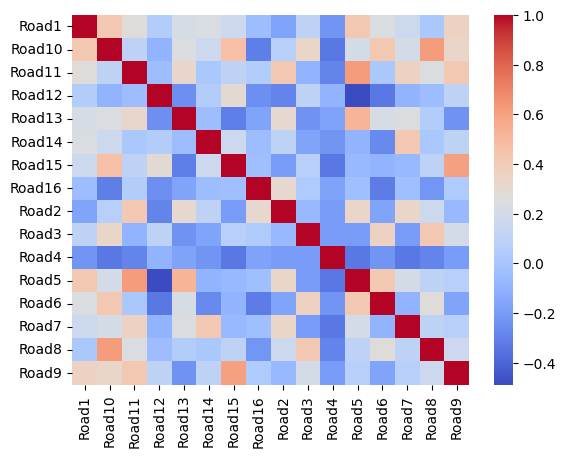

In [ ]:
sns.heatmap(df.corr(), cmap='coolwarm')

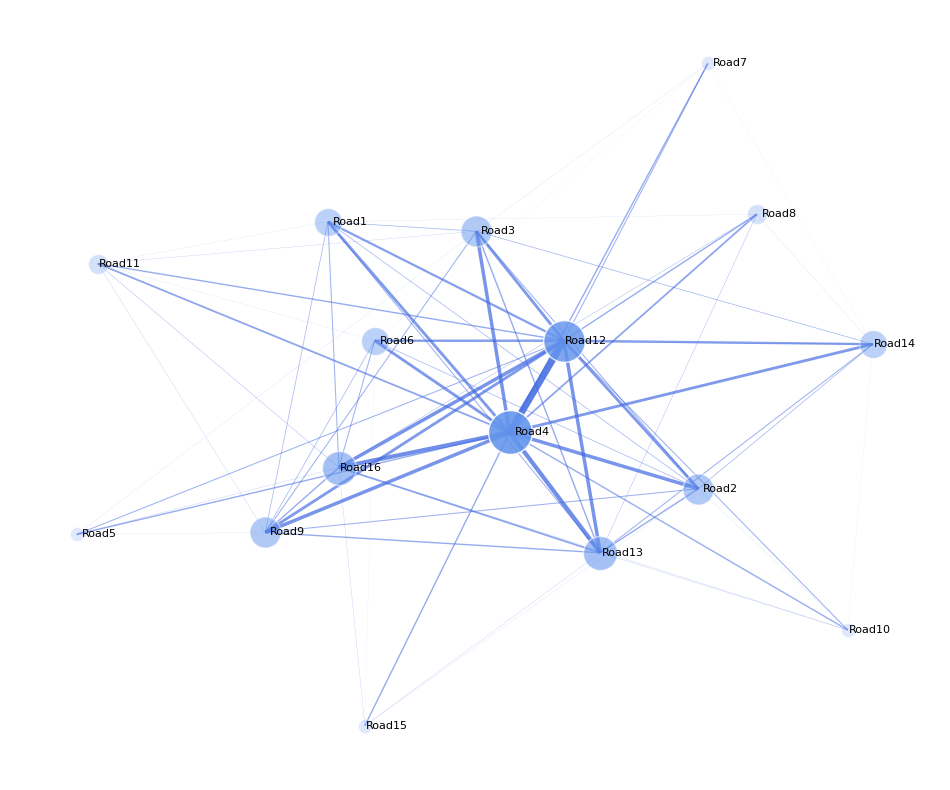

In [ ]:
# Calculate degree centrality
degree_centrality = nx.degree_centrality(G)

# Normalize degree centrality values to range [0, 1]
min_cent = min(degree_centrality.values())
max_cent = max(degree_centrality.values())
norm_centrality = {k: (v - min_cent) / (max_cent - min_cent) if max_cent > min_cent else 0.5 for k, v in degree_centrality.items()}

# Remap normalized centrality to the range [100, 1000] for node sizes
min_size = 100
max_size = 1000
node_sizes = [min_size + (max_size - min_size) * norm_centrality[node] for node in G.nodes()]

# Remap normalized centrality to the range [0.2, 0.8] for alpha
min_alpha = 0.2
max_alpha = 0.9
node_alpha = [min_alpha + (max_alpha - min_alpha) * norm_centrality[node] for node in G.nodes()]

# Calculate edge widths and alpha based on the sum of the node's degree centrality
edge_widths = []
edge_alpha = []
for u, v in G.edges():
    centrality_sum = norm_centrality[u] + norm_centrality[v]
    edge_widths.append(centrality_sum)
    # Normalize and adjust alpha for edges
    edge_alpha.append(min_alpha + (max_alpha - min_alpha) * centrality_sum / 2)

# Draw the graph
plt.figure(figsize=(12, 10))
pos = nx.spring_layout(G)  # Node positions

# Draw nodes with specified properties
for i, node in enumerate(G.nodes()):
    nx.draw_networkx_nodes(G, pos, nodelist=[node], node_size=node_sizes[i],
                           node_color='cornflowerblue', alpha=node_alpha[i],
                           edgecolors='white')  # White boundary

# Draw edges with specified properties
for i, (u, v) in enumerate(G.edges()):
    nx.draw_networkx_edges(G, pos, edgelist=[(u, v)], width=edge_widths[i]**2.5, edge_color='royalblue', alpha=edge_alpha[i])

# Shift label positions to the right of nodes and adjust font size
label_pos = {k: [v[0] + 0.05, v[1]] for k, v in pos.items()}
nx.draw_networkx_labels(G, label_pos, font_size=8, font_family="sans-serif")

plt.axis("off")
plt.show()
